In [1]:
import numpy as np    # Q-Learning Implementation using numpy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
edges = [(0, 3), (0, 4), (2, 5), (4, 7), (3, 8), (1, 9), (7, 5), (7, 1), (8, 5), (3, 4), (4, 2), (2, 7), (3, 2), (6, 7), (4, 6), (8, 2)]
goal = 8

C:\Users\lakku\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


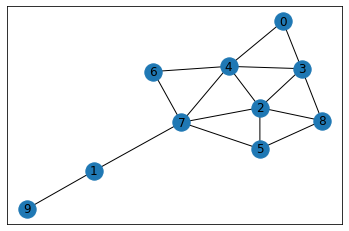

In [3]:
#Building Graph
graph = nx.Graph()
graph.add_edges_from(edges)
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_labels(graph, pos)
plt.show()

In [4]:
#Reward Matrix
size = 10
r = np.matrix(np.ones(shape = (size, size)))
r *= -1
for node in edges:
    if(node[1] is goal):
        r[node] = 100
    else: r[node] = 0
    if(node[0] is goal):
        r[node[::-1]] = 100
    else:
        r[node[::-1]] = 0
r[goal, goal] = 100

In [5]:
r

matrix([[ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.],
        [ -1.,  -1.,  -1.,   0.,   0.,   0.,  -1.,   0., 100.,  -1.],
        [  0.,  -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,   0.,   0.,  -1.,  -1.,   0.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,   0., 100.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,   0.,  -1.,   0.,   0.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,   0.,  -1.,   0.,  -1.,  -1., 100.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [6]:
q = np.matrix(np.zeros(shape = (size, size)))
initial = 7
def available_actions(state):
    avail_acts = np.where(r[state, ] >= 0)[1]
    return avail_acts
actions = available_actions(initial)

In [7]:
def chose_action(actions):
    if(actions.shape[0] > 1):
        action = np.random.choice(actions, 1)
    else:
        action = int(actions)
    return action
action = chose_action(actions)

In [8]:
action, q

(array([4], dtype=int64), matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [9]:
gamma = 0.8
# Updating Q-Matrix
def update_q(state, action, gamma):
    q1 = []
    acts = available_actions(action)
    for i in acts:
        q1.append(q[action, i])
    max_value = np.max(q1)
    q[state, action] = r[state, action] + gamma * max_value
    q1.clear()
    if(np.max(q) > 0):
        return (np.sum(q / np.max(q)*100))
    else:
        return (0)
update_q(initial, action, gamma)

0

In [10]:
# Training my reinforecement model
scores = []
for i in range(1200):
    state = np.random.randint(0, int(q.shape[0]))
    actions = available_actions(state)
    action = chose_action(actions)
    score = update_q(state, action, gamma)
    scores.append(score)

In [11]:
q

matrix([[  0.        ,   0.        ,   0.        , 399.41043106,
         319.62267588,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        , 319.62267588,
           0.        , 204.21043106],
        [  0.        ,   0.        ,   0.        , 399.41043106,
         319.62267588, 399.80681005,   0.        , 319.07879853,
         499.75851256,   0.        ],
        [319.52834485,   0.        , 399.52834485,   0.        ,
         319.62267588,   0.        ,   0.        ,   0.        ,
         499.26303882,   0.        ],
        [319.52834485,   0.        , 399.52834485, 399.41043106,
           0.        ,   0.        , 255.6981407 , 319.07879853,
           0.        ,   0.        ],
        [  0.        ,   0.        , 399.52834485,   0.        ,
           0.        ,   0.        ,   0.        , 319.07879853,
         499.75851256,   0.   

In [13]:
current = initial
steps = [current,]
while current != 8:
    next_step = np.where(q[current, ] == np.max(q[current, ]))[1]
    if(next_step.shape[0] > 1):
        next_step = np.random.choice(next_step, 1)
    next_step = int(next_step)
    steps.append(next_step)
    current = next_step
print("Shortest Path:")
print(steps)

Shortest Path:
[7, 2, 8]


Text(0.5, 1.0, 'Overall Training Score')

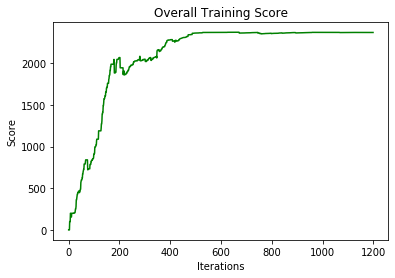

In [14]:
# Score PLot
plt.plot(scores, color = 'g')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.title('Overall Training Score')